In [2]:
# Visualize model performance on validation set

import csv
import pandas as pd
import matplotlib.pyplot as plt

#read in dataframe of all bbox comparisons
file_path = '/home/cara/oregon_critters/runs/detect/0_mc/pred_comparisions.csv'
preds_df = pd.read_csv(file_path)

preds_df.head()


,Unnamed: 0,pred_box,pred_image,pred_class,confidence,match,true_box,true_class,iou,class_match
0,0,0,7762-4__2019-08-13__09-17-47(1),Weasel,0.736720,True,10,CanadaJay,0.711232,False
1,1,1,7762-4__2019-08-13__09-17-47(1),DarkEyedJunco,0.209668,False,10,background,0.000000,False
2,2,2,7762-4__2019-08-13__09-17-47(1),Thrush,0.189620,True,10,CanadaJay,0.736196,False
3,3,3,7762-4__2019-08-13__09-17-48(2),Chickadee,0.484186,True,11,CanadaJay,0.511730,False
4,4,4,7762-4__2019-08-13__09-17-48(2),DarkEyedJunco,0.186659,False,11,background,0.000000,False


Text(0.5, 1.0, 'Confidence scores on validation set')

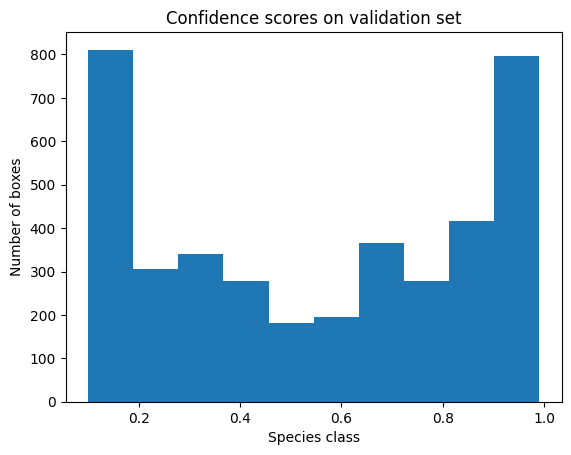

In [5]:
# Now make histograms of scores

#all scores
plt.hist(preds_df['confidence'])
plt.xlabel('Species class')
plt.ylabel('Number of boxes')
plt.title('Confidence scores on validation set')


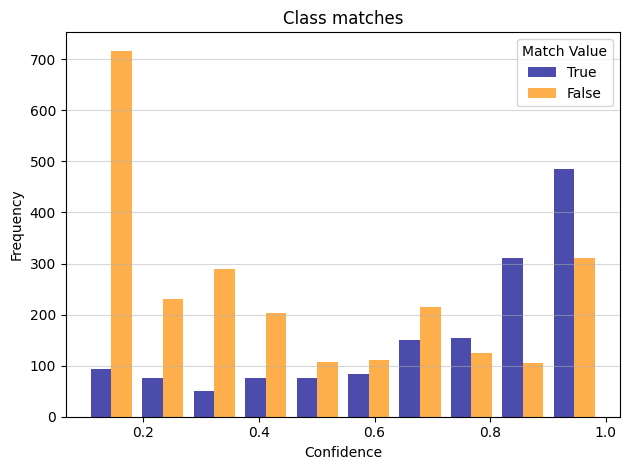

In [11]:

#color by true/false pos
plt.hist([preds_df[preds_df['class_match'] == True]['confidence'], 
          preds_df[preds_df['class_match'] == False]['confidence']],
          bins=10, alpha=0.7, color=['darkblue', 'darkorange'], label=['True', 'False'])

# Set labels and title
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.title("Class matches")
plt.legend()

# Add grid lines
plt.grid(axis='y', alpha=0.5)

# Customize tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend with a shadow
plt.legend(loc='upper right', shadow=True, fontsize=10)

# Add a title for the legend
plt.legend().set_title("Match Value", prop={"size": 10})

# Display the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [12]:
preds_df.head()

,Unnamed: 0,pred_box,pred_image,pred_class,confidence,match,true_box,true_class,iou,class_match
0,0,0,7762-4__2019-08-13__09-17-47(1),Weasel,0.736720,True,10,CanadaJay,0.711232,False
1,1,1,7762-4__2019-08-13__09-17-47(1),DarkEyedJunco,0.209668,False,10,background,0.000000,False
2,2,2,7762-4__2019-08-13__09-17-47(1),Thrush,0.189620,True,10,CanadaJay,0.736196,False
3,3,3,7762-4__2019-08-13__09-17-48(2),Chickadee,0.484186,True,11,CanadaJay,0.511730,False
4,4,4,7762-4__2019-08-13__09-17-48(2),DarkEyedJunco,0.186659,False,11,background,0.000000,False
